In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get the number of data points from the urban cities
sum(city_data_df['type']=='Rural')

18

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Combine both dataframes into a unified dataframe
pyber_data_df= pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

#Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Create the three required data frames
urban_cities_df= pyber_data_df[pyber_data_df['type']=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df['type']=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df['type']=="Rural"]


In [15]:
#Print check
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
#Get the number of rides for urban cities 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [17]:
#get the number of rides for suburban cities 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [18]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [19]:
#Get the average fare for each city 
urban_average_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_average_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
suburban_average_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_average_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [21]:
#Get the average number of drivers for each city type

urban_driver_average = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_average.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
suburban_driver_average = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_average= rural_cities_df.groupby(['city']).mean()['driver_count']

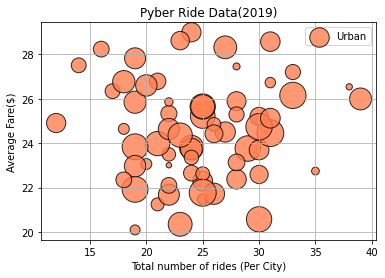

In [23]:
 plt.scatter(urban_ride_count,urban_average_fare,s=10*urban_driver_average,facecolor = 'coral',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Urban")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

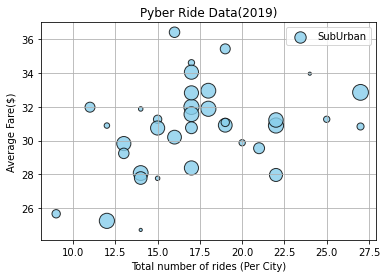

In [24]:
plt.scatter(suburban_ride_count,suburban_average_fare,s=10*suburban_driver_average,facecolor = 'skyblue',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="SubUrban")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

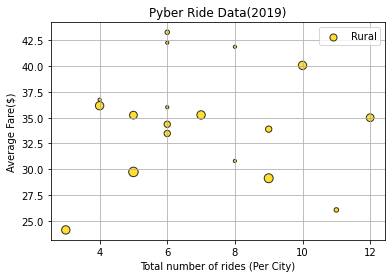

In [25]:
plt.scatter(rural_ride_count,rural_average_fare,s=10*rural_driver_average,facecolor = 'gold',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Rural")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

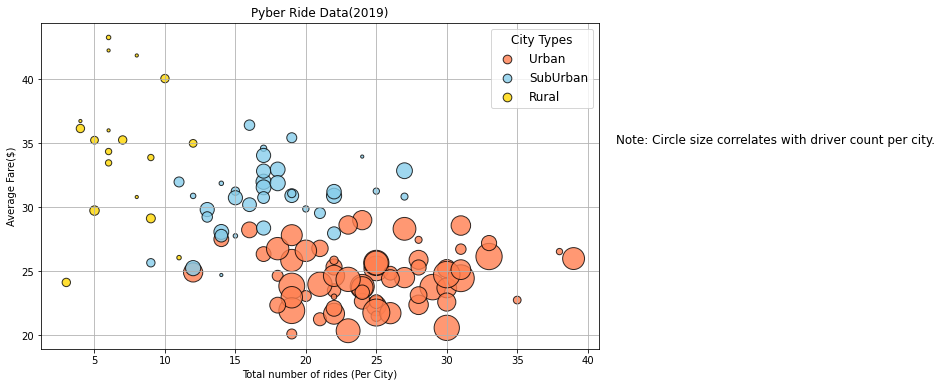

In [26]:
#Build the scatter charts for each city type 

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_average_fare,s=10*urban_driver_average,facecolor = 'coral',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Urban")



plt.scatter(suburban_ride_count,suburban_average_fare,s=10*suburban_driver_average,facecolor = 'skyblue',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="SubUrban")



plt.scatter(rural_ride_count,rural_average_fare,s=10*rural_driver_average,facecolor = 'gold',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Rural")

#Group all the graph properties
plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig('analysis/')
plt.show()


In [27]:
#Get summary statistics (11/26)
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
#Get the mean for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
#Calcuate the mode of the ride count for each type of city 
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [35]:
suburban_ride_count.mode()

0    17
dtype: int64

In [36]:
rural_ride_count.mode()

0    6
dtype: int64

In [37]:
#Import numpy and stats mode from SciPy
import numpy as np
import scipy.stats as sts

In [38]:
#Calculate the measures of central tendency for the ride count of the cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"{mean_suburban_ride_count:.2f}" ,median_suburban_ride_count , mode_suburban_ride_count)

17.36 17.0 ModeResult(mode=array([17]), count=array([7]))


In [39]:
#Get the fares fo each city type
urban_fares = urban_cities_df['fare']
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
print (f"{mean_urban_fares:.2f}", median_urban_fares, mode_urban_fares)

24.53 24.64 ModeResult(mode=array([22.86]), count=array([5]))


In [40]:
suburban_fares= suburban_cities_df['fare']
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.mean(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
print (f"{mean_suburban_fares:.2f}", median_suburban_fares, mode_suburban_fares)

30.97 30.97012800000002 ModeResult(mode=array([17.99]), count=array([3]))


In [41]:
rural_fares = rural_cities_df['fare']
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)
print (f"{mean_rural_fares:.2f}", median_rural_fares, mode_rural_fares)

34.62 37.05 ModeResult(mode=array([37.05]), count=array([2]))


In [42]:
#Get the driver count data 
urban_drivers = urban_cities_df['driver_count']
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print (f"{mean_urban_drivers:.2f}", median_urban_drivers, mode_urban_drivers)

36.68 37.0 ModeResult(mode=array([39]), count=array([86]))


In [43]:
suburban_drivers = suburban_cities_df['driver_count']
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print (f"{mean_suburban_drivers:.2f}", median_suburban_drivers, mode_suburban_drivers)

13.71 16.0 ModeResult(mode=array([20]), count=array([79]))


In [44]:
rural_drivers = rural_cities_df['driver_count']
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print (f"{mean_rural_drivers:.2f}", median_rural_drivers, mode_rural_drivers)

4.30 4.0 ModeResult(mode=array([1]), count=array([32]))


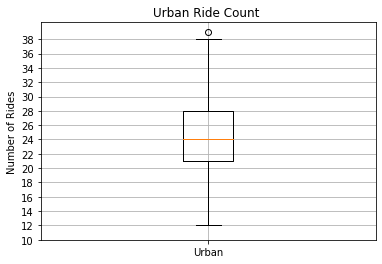

In [45]:
#Create a box and whisker plot for the urban cities ride count 
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
#Add the title , y_axis label and grid 
ax.set_title("Urban Ride Count ")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,40, step=2.0))
ax.grid()
plt.show()

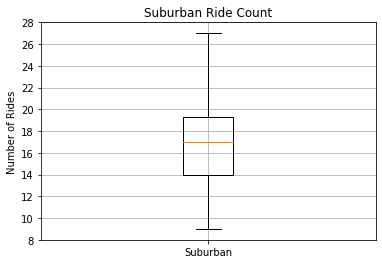

In [46]:
#Box and whisker plot for suburban ride count 
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
#Add the title , y_axis label and grid 
ax.set_title("Suburban Ride Count")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8,30, step= 2.0))
ax.grid()
plt.show()

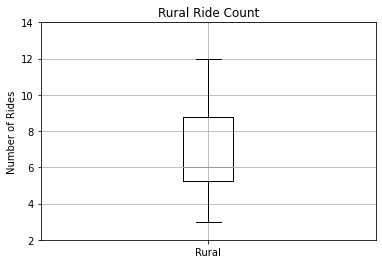

In [47]:
#Box and whisker plots fof rural ride count 

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
#Add the title , y_axis label and grid 
ax.set_title("Rural Ride Count")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2,16, step= 2.0))
ax.grid()
plt.show()

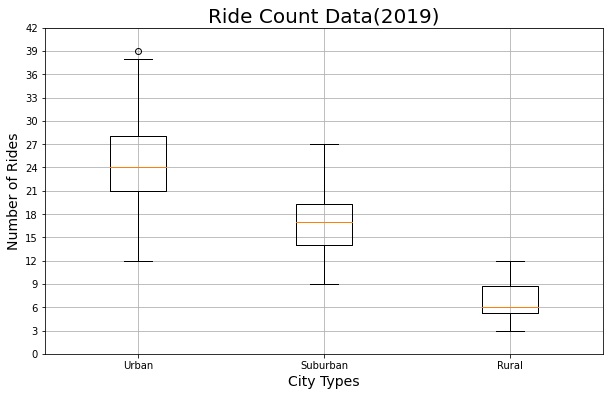

In [48]:
#Combine all plots 

x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

#Add the title , y_axis label and grid 
ax.set_title("Ride Count Data(2019)",fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data,labels = x_labels)
ax.set_yticks(np.arange(0,45, step= 3.0))
ax.grid()
#Save the image
plt.savefig("analysis/Fig2.png")
plt.show()

In [49]:
#Get the city that matches the outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(urban_city_outlier)

West Angela


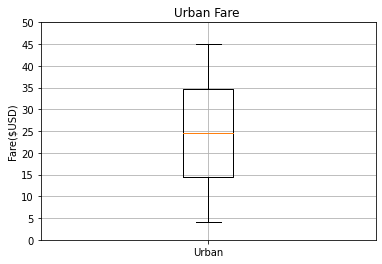

In [50]:
#Box and whisker plot for urban ride fare data 
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_fares , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Urban Fare ")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()

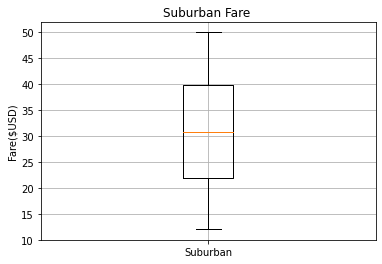

In [51]:
#Box and whisker plot for urban ride fare data 
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Suburban Fare ")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(10,55,step=5.0))
ax.grid()
plt.show()

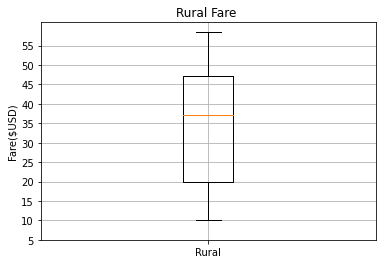

In [52]:
#Box and whisker plot for urban ride fare data 
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_fares , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Rural Fare ")
ax.set_ylabel("Fare($USD)")
ax.set_yticks(np.arange(5,60,step=5.0))
ax.grid()
plt.show()

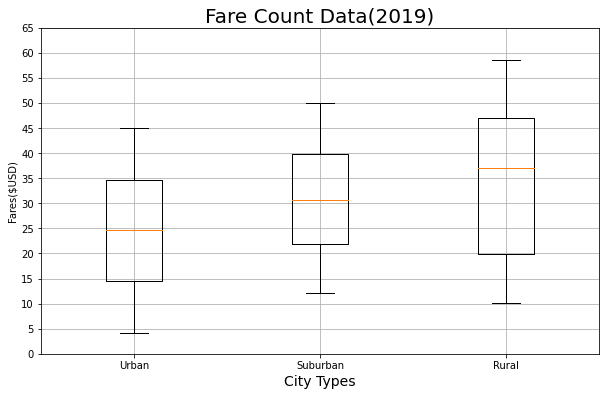

In [53]:
#Combine all plots 

x_labels = ["Urban","Suburban","Rural"]
fare_count_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10,6))

#Add the title , y_axis label and grid 
ax.set_title("Fare Count Data(2019)",fontsize=20)
ax.set_ylabel("Fares($USD)")
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data,labels = x_labels)
ax.set_yticks(np.arange(0,70, step= 5.0))
ax.grid()
#Save the image
plt.savefig("analysis/Fig3.png")
plt.show()

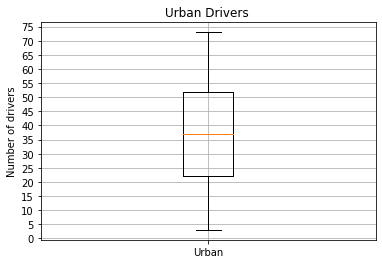

In [54]:
#Box and whisker plot for urban driver data 
x_labels = ["Urban"]
fix, ax = plt.subplots()
ax.boxplot(urban_drivers , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Urban Drivers ")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0,80,step=5.0))
ax.grid()
plt.show()

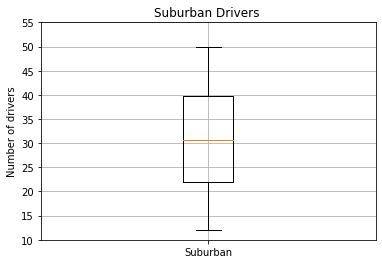

In [55]:
#Box and whisker plot for urban ride fare data 
x_labels = ["Suburban"]
fix, ax = plt.subplots()
ax.boxplot(suburban_fares , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Suburban Drivers ")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(10,60,step=5.0))
ax.grid()
plt.show()

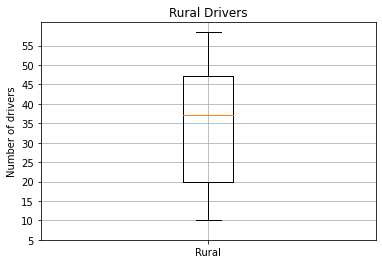

In [56]:
#Box and whisker plot for urban ride fare data 
x_labels = ["Rural"]
fix, ax = plt.subplots()
ax.boxplot(rural_fares , labels=x_labels)
#Add the title, y_label and grid 
ax.set_title("Rural Drivers")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(5,60,step=5.0))
ax.grid()
plt.show()

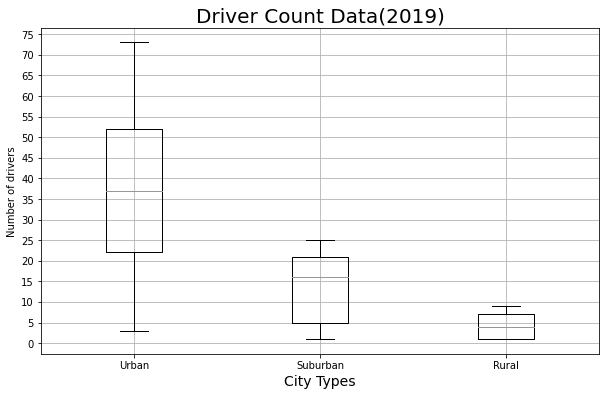

In [57]:
#Combine all plots 

x_labels = ["Urban","Suburban","Rural"]
driver_count_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))

#Add the title , y_axis label and grid 
ax.set_title("Driver Count Data(2019)",fontsize=20)
ax.set_ylabel("Number of drivers")
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data,labels = x_labels)
ax.set_yticks(np.arange(0,80, step= 5.0))
ax.grid()
#Save the image
plt.savefig("analysis/Fig4.png")
plt.show()

In [58]:
#Hard way ---
# #Get the total fare for each city 
# urban_total_fare = urban_cities_df.sum()['fare']
# (f"{urban_total_fare:.2f}")

In [59]:
# suburban_total_fare = suburban_cities_df.sum()['fare']
# rural_total_fare = rural_cities_df.sum()['fare']

In [60]:
# #Get the total fares for all city types 
# total_fares = (urban_total_fare + suburban_total_fare + rural_total_fare)
# total_fares

In [61]:
# perc_urban_fare = urban_total_fare / total_fares*100
# perc_urban_fare

In [62]:
# perc_suburban_fare = suburban_total_fare /total_fares*100
# perc_rural_fare = rural_total_fare /total_fares*100

In [63]:
#Smarter way ---
#Get the sum of all teh fares by city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:

# Get the sum of all the fares 
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [65]:
#Calculate the percentage of fares for each city type.
type_percents = 100*sum_fares_by_type /total_fares 
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [66]:
#An even shorter way 
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

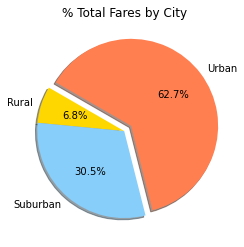

In [67]:
#Import mpl to change the plot config using rcParams
import matplotlib as mpl

#Build the percentage of fares by city type pie chart
plt.pie(type_percents, labels=["Rural","Suburban","Urban"],colors=["gold","lightskyblue","coral"],
       explode = [0,0,0.1],autopct='%1.1f%%', shadow=True,startangle=150)
plt.title("% Total Fares by City")
mpl.rcParams['font.size']=14
#save figure 
plt.savefig('analysis/figure6.png')
plt.show()

In [68]:
#Get the total number of rides per city type
sum_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [69]:
total_rides = pyber_data_df['ride_id'].count()
total_rides 

2375

In [70]:
rides_percents = 100 * sum_rides_by_type / total_rides
rides_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

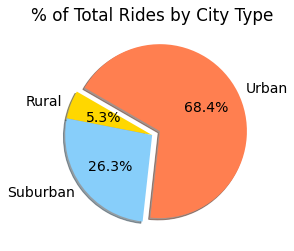

In [74]:
import matplotlib as mpl

#Plot the chart 
plt.pie(rides_percents,labels=['Rural','Suburban','Urban'],colors = ['gold','lightskyblue','coral'],
         explode = [0,0,0.1],
        startangle=150,shadow=True,autopct='%1.1f%%')
plt.title('% of Total Rides by City Type')

mpl.rcParams['font.size']=14

plt.savefig('analysis/fig7.png')
plt.show()

In [82]:
#Get the total drivers by city type
sum_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [83]:
total_drivers = city_data_df['driver_count'].sum()
total_drivers

2973

In [84]:
driver_percents= 100 * sum_drivers_by_type / total_drivers
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

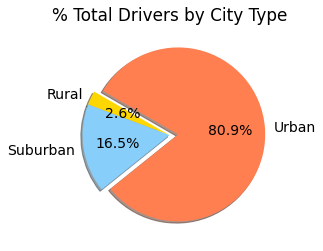

In [87]:
#plot the pie chart 

plt.pie(driver_percents, labels = ['Rural','Suburban','Urban'],colors = ['gold','lightskyblue','coral'],
       startangle = 150,explode= [0,0,0.1],shadow = True,autopct='%1.1f%%')

plt.title("% Total Drivers by City Type")
mpl.rcParams['font.size']=14
plt.savefig('analysis/fig8.png')
plt.show()